In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fullData = pd.read_csv("weekly_cancer.csv")
#myData = fullData[['Quarter', 'HB', 'CancerType','NumberOfEligibleReferrals31DayStandard','NumberOfEligibleReferralsTreatedWithin31Days']]
HBs=pd.read_csv("HBs.csv")

In [40]:
HBs

,HB,HBName,HBDateEnacted,HBDateArchived,Country
0,S08000015,NHS Ayrshire and Arran,20140401,NaN,S92000003
1,S08000016,NHS Borders,20140401,NaN,S92000003
2,S08000017,NHS Dumfries and Galloway,20140401,NaN,S92000003
3,S08000018,NHS Fife,20140401,20180201.0,S92000003
4,S08000019,NHS Forth Valley,20140401,NaN,S92000003
5,S08000020,NHS Grampian,20140401,NaN,S92000003
6,S08000021,NHS Greater Glasgow and Clyde,20140401,20190331.0,S92000003
7,S08000022,NHS Highland,20140401,NaN,S92000003
8,S08000023,NHS Lanarkshire,20140401,20190331.0,S92000003
9,S08000024,NHS Lothian,20140401,NaN,S92000003


In [66]:
Areas=np.asarray(fullData['Area name'])
HB_code=np.asarray(HBs['HB'])
HB_name=np.asarray(HBs['HBName'])

for i in np.arange(len(HB_name)):
    y=np.where(Areas==HB_name[i])
    Areas[y]=HB_code[i]


fullData['HB'] =Areas.tolist()

fullData.rename(columns={"Cancer type": "CancerType"}, inplace=True)
f=fullData

In [67]:
fullData

,Area name,CancerType,Sex,Age Group,Deprivation Quintile (0=unknown),Week Number,Count 2019,Count 2020,Count 2021,Breakdown,HB
0,NCA,All Cancers,Male,All Ages,0,1,92.0,23,113.0,None,NCA
1,NCA,All Cancers,Female,All Ages,0,1,88.0,29,92.0,None,NCA
2,NCA,All Cancers,All,All Ages,0,1,180.0,52,205.0,None,NCA
3,NCA,All Malignant Neoplasms (Excl. C44),Male,All Ages,0,1,59.0,16,75.0,None,NCA
4,NCA,All Malignant Neoplasms (Excl. C44),Female,All Ages,0,1,66.0,23,80.0,None,NCA
...,...,...,...,...,...,...,...,...,...,...,...
671346,S08000027,Leukaemias,Female,All Ages,2,53,NaN,0,NaN,Deprivation,S08000027
671347,S08000028,Hodgkin Lymphoma,Female,All Ages,3,53,NaN,0,NaN,Deprivation,S08000028
671348,S08000028,Pancreas,Male,All Ages,2,53,NaN,0,NaN,Deprivation,S08000028
671349,S08000028,Pancreas,All,All Ages,2,53,NaN,0,NaN,Deprivation,S08000028


In [74]:


keep_col = ['HB','CancerType','Sex','Age Group', 'Week Number','Count 2019']
cancerdata_2019 = f[keep_col]
cancerdata_2019.rename(columns={"Count 2019": "Count"}, inplace=True)
keep_col = ['HB','CancerType','Sex','Age Group', 'Week Number','Count 2020']
cancerdata_2020 = f[keep_col]

cancerdata_2020.rename(columns={"Count 2020": "Count"}, inplace=True)
keep_col = ['HB','CancerType','Sex','Age Group', 'Week Number','Count 2021']
cancerdata_2021 = f[keep_col]

cancerdata_2021.rename(columns={"Count 2021": "Count"}, inplace=True)



/home/s1657372/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [75]:
month=np.mod(np.asarray(cancerdata_2019['Week Number']),12)+1
year_month_week=np.asarray(cancerdata_2019['Week Number'])+month*100+20190000
quarter=201900+np.mod(np.asarray(cancerdata_2019['Week Number']),4)+1
cancerdata_2019['Quarter'] =quarter.tolist()
cancerdata_2019['Month'] =month.tolist()
cancerdata_2019['Date'] =year_month_week.tolist()


month=np.mod(np.asarray(cancerdata_2020['Week Number']),12)+1
year_month_week=np.asarray(cancerdata_2020['Week Number'])+month*100+20200000
quarter=202000+np.mod(np.asarray(cancerdata_2020['Week Number']),4)+1
cancerdata_2020['Quarter'] =quarter.tolist()
cancerdata_2020['Month'] =month.tolist()
cancerdata_2020['Date'] =year_month_week.tolist()

month=np.mod(np.asarray(cancerdata_2021['Week Number']),12)+1
year_month_week=np.asarray(cancerdata_2021['Week Number'])+month*100+20210000
quarter=202100+np.mod(np.asarray(cancerdata_2021['Week Number']),4)+1
cancerdata_2021['Quarter'] =quarter.tolist()
cancerdata_2021['Month'] =month.tolist()
cancerdata_2021['Date'] =year_month_week.tolist()


<ipython-input-75-508b37fbf634>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancerdata_2019['Quarter'] =quarter.tolist()
<ipython-input-75-508b37fbf634>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancerdata_2019['Month'] =month.tolist()
<ipython-input-75-508b37fbf634>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [76]:

all_years=pd.concat([cancerdata_2019,cancerdata_2020,cancerdata_2021],ignore_index=True)

In [77]:
min(quarter)

202101

In [78]:
all_years.to_csv('ready_cancerdata.csv')

In [73]:
counts=np.asarray(all_years['Count'])

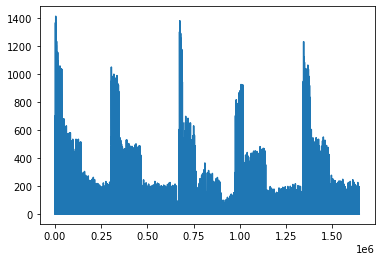

In [65]:
plt.plot(counts)